<a href="https://colab.research.google.com/github/lingliao/Kwame/blob/main/Kwame_Randi_Abigail_Ling_DataVisualization_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kwame_Randi_Ling_DataVisualization-1.0
### Jun 7, 2023

In [87]:
install.packages("ggplot2")
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [88]:
library(ggplot2)
library(readxl)
library(dplyr)

In [89]:
 #read in the excel file
 readfile <- read_excel("/content/Hangrip updated.xlsx")

In [90]:
#check the content of the file
head(readfile)

ID,Q1_Gender,Q2_Age,Q3_Education,Q4_Meals,Q5_Snacks,Q6_Illness_frequency,Q7_Occupation,Q8_Physical_activity,Q9_Dorminat_hand,⋯,Q14_Nutritional_status,Q15_Handgrip_strength_kg,Q16_Weight_kg,Q17_Height_m,Q18_MUAC_cm,BMI,ZBMI,ZQ18_MUAC_cm,ZQ15_Handgrip_strength_kg,ZQ17_Height_m
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HGS001,Male,4,Nursery,3,4,Once in a month,Trader,30-50mins per week,Left hand,⋯,Optimally nourished,20.0,16.25,1.02,15.8,15.61899,-0.00583628,-0.8152731,0.27215870,-2.154992
HGS002,Male,8,Upper primary,4,2,Once in a month,Trader,10-30mins per week,Right hand,⋯,Optimally nourished,19.6,24.30,1.12,16.5,19.37181,1.70389344,-0.5435913,0.19348041,-1.454713
HGS003,Female,14,Upper primary,4,3,Twice in a week,Trader,70-90mins per week,Right hand,⋯,Malnourished,22.4,26.30,1.15,16.0,19.88658,1.93841392,-0.7376498,0.74422844,-1.244629
HGS004,Female,9,Upper primary,3,2,Once in a month,Farmer,50-70mins per week,Left hand,⋯,Optimally nourished,19.8,27.63,1.13,17.1,21.63834,2.73649239,-0.3107212,0.23281955,-1.384685
HGS005,Male,11,Upper primary,3,2,Twice in a month,Teacher,10-30mins per week,Left hand,⋯,Optimally nourished,18.2,24.32,1.16,17.0,18.07372,1.11250270,-0.3495329,-0.08189361,-1.174601
HGS006,Female,12,Upper primary,2,1,Once in a month,Teacher,50-70mins per week,Right hand,⋯,At risk of malnutrition,12.0,15.97,1.09,10.5,13.44163,-0.99781139,-2.8722926,-2.30140712,-1.664797


In [91]:
#dimention of the file
dim(readfile)

[1] 375  24

`geom_smooth()` using formula = 'y ~ x'


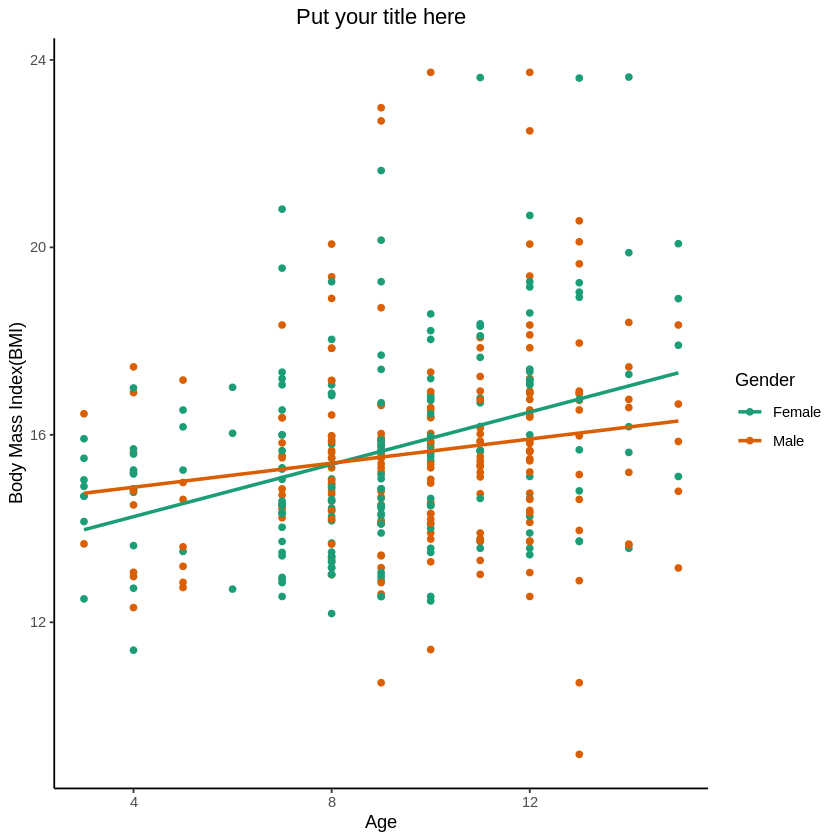

In [101]:
#Basic visualization
#BMI, age and gender
p <- ggplot(readfile, aes(x=Q2_Age, y=BMI, color=Q1_Gender)) +
  geom_point() + 
  geom_smooth(method=lm, se=FALSE, fullrange=TRUE)+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(x="Age", 
       y="Body Mass Index(BMI)", 
       title="Put your title here") +
  guides(color = guide_legend(title = "Gender"))
# Use brewer color palettes
p+scale_color_brewer(palette="Dark2")


In [93]:
# Check how many unique types a column has
# unique(readfile$Q8_Physical_activity)

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: environment
    rescale: function
    reset: function
    scale_name: brewer
    train: function
    train_df: function
    transform: function
    transform_df: function
    super:  <ggproto object: Class ScaleDiscrete, Scale, gg>

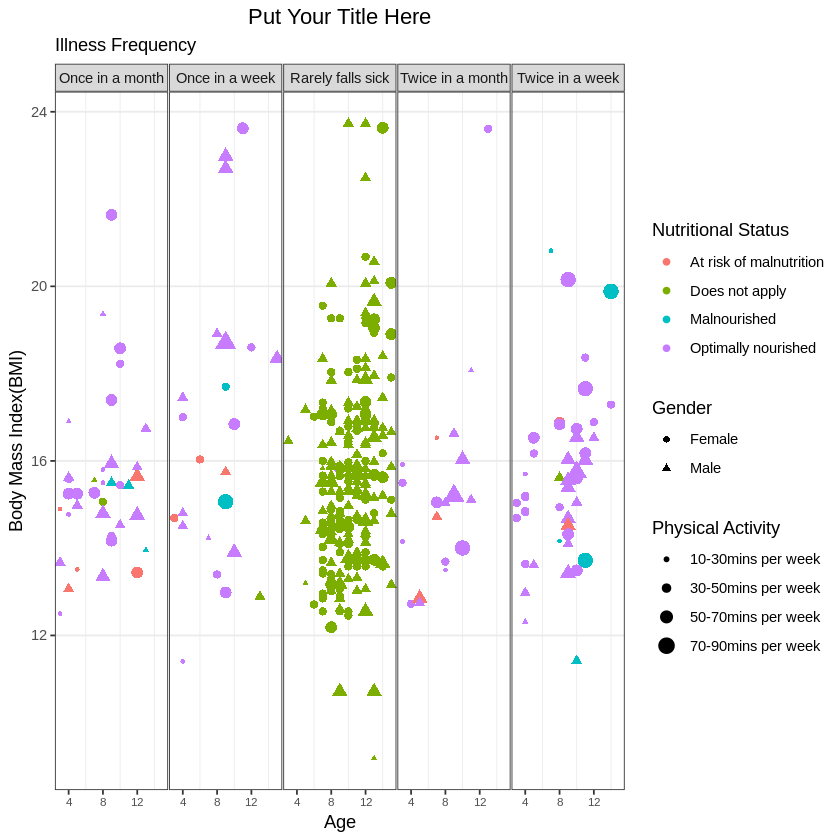

In [94]:
#################################################################
# A more complicated version with multi-level information       #
# Relationship between illness frequency and various factors    #
# Age                                                           #
# Gender                                                        #
# BMI                                                           #
# Physical activity frequency                                   #
# Nutritional status                                            #
#################################################################
# create plot
ggplot(readfile, 
       aes(y =  BMI, 
           x = Q2_Age,
           color = Q14_Nutritional_status)) +
  geom_point(aes(shape = Q1_Gender, size = Q8_Physical_activity)) +
#  scale_size_manual(values = c("Nursery" = 2, "Upper primary" = 1, "Lower primary" = 3, "JHS" = 5, "Kindergarten" = 4)) +
 scale_size_manual(values = c("30-50mins per week" = 2, "10-30mins per week" = 1, "70-90mins per week" = 4, "50-70mins per week" = 3)) +
  # scale_x_continuous(limits = c(0, 60), breaks = seq(15, 45, by = 30)) +
  facet_grid( . ~ Q6_Illness_frequency,switch = "y",labeller = label_wrap_gen(20)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(#panel.spacing.x=unit(0.2, "lines"),
        axis.text.x=element_text(size=7,angle = 0),
        #panel.spacing.x = unit(2, "lines"),
        strip.text.y = element_text(size = 7, angle = 0),
        panel.spacing = unit(0.2, "mm"),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank()) +
  labs(x="Age", 
       y="Body Mass Index(BMI)", 
       title="Put Your Title Here",
       subtitle = "Illness Frequency") +
  guides(size = guide_legend(title = "Physical Activity"),
         shape = guide_legend(title = "Gender"),
         color = guide_legend(title = "Nutritional Status"))
  scale_color_brewer(palette="Set2")



In [95]:
#save the plot with desigend size and dpi
ggsave(file="visualization_example.pdf", width=9, height=6, dpi=1000)